# **First task**

# New Section

Take the following text and transform it into a list of **lists with with each element being a tokenized sentence**. *Remove stopwords, lower all tokens and keep only alpha-numeric tokens:*

"I’ve been called many things in my life, but never an optimist. That was fine by me. I believed pessimists lived in a constant state of pleasant surprise: if you always expected the worst, things generally turned out better than you imagined. The only real problem with pessimism, I figured, was that too much of it could accidentally turn you into an optimist."


In [343]:
import nltk #this part is needed on colab.
nltk.download('punkt')
nltk.download('stopwords')
#----------------------------------------

# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
text = "I’ve been called many things in my life, but never an optimist. That was fine by me. I believed pessimists lived in a constant state of pleasant surprise: if you always expected the worst, things generally turned out better than you imagined. The only real problem with pessimism, I figured, was that too much of it could accidentally turn you into an optimist."

Tokenize, tolower and remove stopwords

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [0]:
text_sent = sent_tokenize(text)


In [0]:
text2= []
for sent in text_sent:
  text2.append([word.lower() for word in word_tokenize(sent) if word not in stop_words and word.isalnum()])

In [348]:
text2

[['i', 'called', 'many', 'things', 'life', 'never', 'optimist'],
 ['that', 'fine'],
 ['i',
  'believed',
  'pessimists',
  'lived',
  'constant',
  'state',
  'pleasant',
  'surprise',
  'always',
  'expected',
  'worst',
  'things',
  'generally',
  'turned',
  'better',
  'imagined'],
 ['the',
  'real',
  'problem',
  'pessimism',
  'i',
  'figured',
  'much',
  'could',
  'accidentally',
  'turn',
  'optimist']]

# Second task

The link below holds a datasewt with ~10k #OKBoomer tweets from the days 10-21 Nov.

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/tweets_boomer.zip

Use elements from the above code to make a list of the most common hashtags (you have to get the hashtags from the text, not using the column containing them already)


#### Hashtags over time

Let's try to do something different and try to have a look at hashtags over time: 

We will take out the 10 most common hashtags - excluding #OKBoomer - and plot their occurrence over the days in the data

Plan of attach:

*   Convert the dataframe into a time-series (by setting a date-time-index)
*   Resample for some time-period: in our case days
*   Calculate the occurence of the specific hashtags in the chosen timespan
*   Plot





In [0]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) #to see more text

import numpy as np
import seaborn as sns

import itertools
from collections import Counter

In [0]:
# Tokenizing Tweets made easy!
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [351]:
# download and open some Trump tweets from trump_tweet_data_archive

boomer_hash_df = pd.read_json('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/tweets_boomer.zip')
boomer_hash_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,lang
0,1197612747715837952,1197612747715837952,2019-11-21 20:28:24,2019-11-21 20:28:24,UTC,,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],[],262050686,262050686,DanClarkSports,Dan,3,1,https://twitter.com/DanClarkSports/status/1197612747715837953,False,0,0,0,https://twitter.com/Fox35Matt/status/1197185353330909184,#okboomer,,,,,,,"[{'user_id': '262050686', 'username': 'DanClarkSports'}]",,en
1,1197612550403297280,1197612550403297280,2019-11-21 20:27:37,2019-11-21 20:27:37,UTC,,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",[],41444665,41444665,sinths,Sven Thomas,2,12,https://twitter.com/sinths/status/1197612550403297280,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '41444665', 'username': 'sinths'}]",,en
2,1197612190867476480,1197611882955325440,2019-11-21 20:26:11,2019-11-21 20:26:11,UTC,,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],[],1005516908181925888,1005516908181925888,DustFar,FarThrustStarDust,1,12,https://twitter.com/DustFar/status/1197612190867476481,False,0,1,0,,#okboomer,,,,,,,"[{'user_id': '1005516908181925888', 'username': 'DustFar'}, {'user_id': '113713991', 'username': 'timstao'}]",,en
3,1197611782669402112,1197611782669402112,2019-11-21 20:24:34,2019-11-21 20:24:34,UTC,,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],[],2509106274,2509106274,summerash99,"queer, sultry summer",7,9,https://twitter.com/summerash99/status/1197611782669402113,False,1,0,0,,#okboomer,,,,,,,"[{'user_id': '2509106274', 'username': 'summerash99'}]",,en
4,1197611614687637504,1197611614687637504,2019-11-21 20:23:54,2019-11-21 20:23:54,UTC,,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",[],2789202068,2789202068,Crayondroids,Crayondroids,6,22,https://twitter.com/Crayondroids/status/1197611614687637504,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '2789202068', 'username': 'Crayondroids'}]",,en


In [0]:
# Reset index (not really needed but why not)
boomer_hash_df = boomer_hash_df.set_index(pd.to_datetime(boomer_hash_df.created_at))

In [0]:
# Let's identify people Hashtags mention together with #OkBoomer
boomer_hash_df['co_hash'] = boomer_hash_df['tweet'].map(lambda textline: [tag for tag in tknzr.tokenize(textline) if tag.startswith('#')])

In [354]:
boomer_hash_df['co_hash'].head()

created_at
2019-11-21 20:28:24    [#OkBoomer]                
2019-11-21 20:27:37    [#OkBoomer, #GenX]         
2019-11-21 20:26:11    [#OkBoomer]                
2019-11-21 20:24:34    [#OkBoomer]                
2019-11-21 20:23:54    [#okboomer, #expirealready]
Name: co_hash, dtype: object

Removing the variants of #okboomer

In [0]:
boomer_hash_df['co_hash'] = boomer_hash_df['co_hash'].map(lambda x: [word.lower() for word in x if word.lower() not in ["#okboomer"]])

In [0]:
# Only keep tweets where a mention i present
boomer_hash_df = boomer_hash_df[boomer_hash_df['co_hash'].map(len) > 0]

In [357]:
# Using the counter method from collector 

## *star open ups elements in....
boomer_hash = itertools.chain(*boomer_hash_df['co_hash'])
# Count up and show
counted_tags = Counter(boomer_hash)
counted_tags.most_common()[:10]

[('#boomer', 281),
 ('#millennials', 247),
 ('#genx', 203),
 ('#genz', 159),
 ('#okboomers', 153),
 ('#oktrumper', 149),
 ('#boomers', 137),
 ('#okmillennial', 128),
 ('#okayboomer', 87),
 ('#boom25', 76)]

In [0]:
# Get most common hashtags

most_common = Counter(itertools.chain(*tweets_boomer.hashtags)).most_common(15)

In [359]:
# Isolate the hashtags only - because they are stored in tuples (pair of key + value)
most_common = [x for x,y in most_common][1:]
most_common

['#boomer',
 '#millennials',
 '#genx',
 '#genz',
 '#okboomers',
 '#oktrumper',
 '#boomers',
 '#okmillennial',
 '#okayboomer',
 '#boom25',
 '#millenials',
 '#babyboomers',
 '#boomeradvice',
 '#meme']

In [0]:
# Create new columns (one for each hashtag) and fill with 0

for col in most_common:
  boomer_hash_df[col] = 0

In [0]:
# Iterate over hashtags and fill in the corresponding columns with 1 if hashtag present in a tweet
for hashtag in most_common:
  boomer_hash_df[hashtag] = boomer_hash_df['hashtags'].map(lambda t: 1 if hashtag in t else 0)

In [0]:
# Import plotting stuff
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

In [363]:
# count up occurence of hashtags in timeframe of interest

boomer_hash_df.resample('D')[most_common].sum()

,#boomer,#millennials,#genx,#genz,#okboomers,#oktrumper,#boomers,#okmillennial,#okayboomer,#boom25,#millenials,#babyboomers,#boomeradvice,#meme
created_at,,,,,,,,,,,,,,
2019-11-11,22,23,21,19,8,0,12,2,3,1,8,5,10,4
2019-11-12,45,29,22,14,16,0,15,1,6,13,9,10,9,4
2019-11-13,47,26,18,18,26,1,16,1,19,17,7,5,12,7
2019-11-14,22,16,11,7,14,0,22,1,8,4,4,6,8,7
2019-11-15,19,23,20,13,6,0,11,2,4,0,3,2,4,5
2019-11-16,10,23,21,16,7,1,16,3,11,0,8,9,6,0
2019-11-17,29,16,21,15,19,0,9,0,9,16,6,11,2,2
2019-11-18,25,20,15,9,19,103,5,71,6,13,4,3,3,2
2019-11-19,14,27,18,13,13,19,13,31,5,0,9,5,2,13


##Plotting

In [0]:
!pip install -qq holoviews
!pip install -qq -U bokeh

In [365]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show


Output hidden; open in https://colab.research.google.com to view.

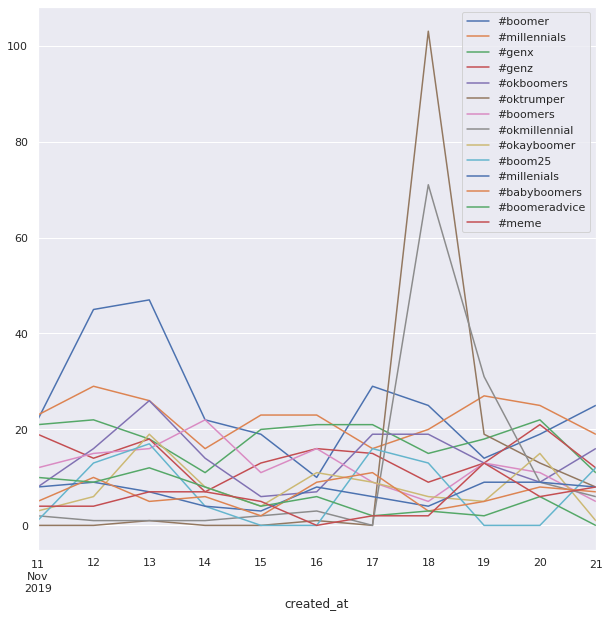

In [366]:
# Count up and plot in one go
boomer_hash_df.resample('D')[most_common].sum().plot()


# Third task
![alt text](https://media.giphy.com/media/1zjRp3fs05jhjTuwr3/giphy.gif)

Perform an LDA analysis of the #OKBoomer dataset

- Filter the corpus using `tweet-preprocessor` - try to figure out how to use it using it's documentation
- Clean up further with SpaCy (keep only ADV, ADJ, NOUN)
- Use Gensim to build a Dictionary (Filter extremes) and Corpus
- Use Gensim to run LDA
- Identify 10 topics
- Plot topic-counts by day

In [0]:
import preprocessor as p

In [368]:
!pip install tweet-preprocessor

In [411]:
boomer_tweets_df = pd.read_json('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/tweets_boomer.zip')
boomer_tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,lang
0,1197612747715837952,1197612747715837952,2019-11-21 20:28:24,2019-11-21 20:28:24,UTC,,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],[],262050686,262050686,DanClarkSports,Dan,3,1,https://twitter.com/DanClarkSports/status/1197612747715837953,False,0,0,0,https://twitter.com/Fox35Matt/status/1197185353330909184,#okboomer,,,,,,,"[{'user_id': '262050686', 'username': 'DanClarkSports'}]",,en
1,1197612550403297280,1197612550403297280,2019-11-21 20:27:37,2019-11-21 20:27:37,UTC,,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",[],41444665,41444665,sinths,Sven Thomas,2,12,https://twitter.com/sinths/status/1197612550403297280,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '41444665', 'username': 'sinths'}]",,en
2,1197612190867476480,1197611882955325440,2019-11-21 20:26:11,2019-11-21 20:26:11,UTC,,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],[],1005516908181925888,1005516908181925888,DustFar,FarThrustStarDust,1,12,https://twitter.com/DustFar/status/1197612190867476481,False,0,1,0,,#okboomer,,,,,,,"[{'user_id': '1005516908181925888', 'username': 'DustFar'}, {'user_id': '113713991', 'username': 'timstao'}]",,en
3,1197611782669402112,1197611782669402112,2019-11-21 20:24:34,2019-11-21 20:24:34,UTC,,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],[],2509106274,2509106274,summerash99,"queer, sultry summer",7,9,https://twitter.com/summerash99/status/1197611782669402113,False,1,0,0,,#okboomer,,,,,,,"[{'user_id': '2509106274', 'username': 'summerash99'}]",,en
4,1197611614687637504,1197611614687637504,2019-11-21 20:23:54,2019-11-21 20:23:54,UTC,,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",[],2789202068,2789202068,Crayondroids,Crayondroids,6,22,https://twitter.com/Crayondroids/status/1197611614687637504,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '2789202068', 'username': 'Crayondroids'}]",,en


In [0]:
#Setting the time index
boomer_tweets_df = boomer_tweets_df.set_index(pd.to_datetime(boomer_tweets_df.created_at))

#Using the Tweet **preprocessor**


In [0]:
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.HASHTAG)
clean_tweet = []
for x in boomer_tweets_df['tweet']:
 clean_tweet.append(p.clean(x))

boomer_tweets_df['clean_tweet'] = clean_tweet

In [414]:
boomer_tweets_df['clean_tweet'].head()

created_at
2019-11-21 20:28:24    Suddenly, is trending again. …                   
2019-11-21 20:27:37    I like my role in this 🤷‍️                       
2019-11-21 20:26:11    He looks allot like you. Old and white.          
2019-11-21 20:24:34    wait is my university’s president gaslighting me?
2019-11-21 20:23:54    Shut up Conway you whiny, fragile fossil.        
Name: clean_tweet, dtype: object

# Using **Spacy**

In [0]:
import spacy
nlp = spacy.load("en")

In [0]:
tokens = []

for tweets in nlp.pipe(boomer_tweets_df['clean_tweet']):
  proj_tok = [token.lemma_.lower() for token in tweets if token.pos_ in ['NOUN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

In [0]:
# adding tokens to our data:

boomer_tweets_df['tokens'] = tokens

In [418]:
boomer_tweets_df['tokens'].head()

created_at
2019-11-21 20:28:24    [suddenly]             
2019-11-21 20:27:37    [role, ‍️]             
2019-11-21 20:26:11    [allot, old, white]    
2019-11-21 20:24:34    [university, president]
2019-11-21 20:23:54    [fragile, fossil]      
Name: tokens, dtype: object

In [0]:
!pip install -qq -U gensim 

In [0]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [0]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(boomer_tweets_df['tokens'])

In [0]:
# filter out low-frequency / high-frequency stuff, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

Create corpus using our dictionary, but first we have to remove the rows from our data, that now - after cleanin - contain no tokens....

In [0]:
# Remove empty rows

boomer_tweets_df = boomer_tweets_df[boomer_tweets_df['tokens'].map(len) > 0]

In [0]:
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in boomer_tweets_df['tokens']]

In [425]:
# That's how the corpus looksdictionary
corpus

[(7, 1),
 (69, 1),
 (82, 1),
 (85, 1),
 (220, 1),
 (221, 1),
 (222, 1),
 (223, 1),
 (224, 1),
 (225, 1)]

In [0]:
example_doc = corpus[100][:10]

In [455]:
[dictionary.get(word[0], word[1]) for word in example_doc]

['boomer',
 'right',
 'generation',
 'big',
 'away',
 'confused',
 'debate',
 'difference',
 'freedom',
 'seriously']

#LDA model

In [0]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [0]:
# Training the model (makes some mess atm due to version clashes)

lda_model = LdaMulticore(corpus, id2word=dictionary,  num_topics=10, workers = 4, passes=10)

In [428]:
# Check out topics
lda_model.print_topics(-1)

[(0,
  '0.063*"boomer" + 0.037*"not" + 0.029*"word" + 0.027*"guy" + 0.019*"bad" + 0.019*"time" + 0.016*"old" + 0.015*"drug" + 0.015*"day" + 0.014*"lol"'),
 (1,
  '0.163*"boomer" + 0.081*"not" + 0.023*"people" + 0.017*"game" + 0.017*"baby" + 0.015*"time" + 0.015*"generation" + 0.015*"long" + 0.013*"online" + 0.013*"literally"'),
 (2,
  '0.082*"good" + 0.052*"meme" + 0.047*"time" + 0.034*"day" + 0.030*"new" + 0.018*"thought" + 0.015*"phone" + 0.013*"week" + 0.012*"perfect" + 0.012*"example"'),
 (3,
  '0.043*"kid" + 0.022*"climate" + 0.021*"big" + 0.021*"generation" + 0.021*"year" + 0.019*"shirt" + 0.018*"school" + 0.018*"change" + 0.017*"movie" + 0.017*"great"'),
 (4,
  '0.045*"not" + 0.045*"people" + 0.042*"generation" + 0.038*"old" + 0.027*"boomer" + 0.016*"millennial" + 0.014*"young" + 0.014*"idea" + 0.014*"white" + 0.013*"day"'),
 (5,
  '0.098*"boomer" + 0.069*"ok" + 0.052*"thing" + 0.023*"millennial" + 0.022*"parent" + 0.021*"today" + 0.020*"life" + 0.017*"world" + 0.016*"kid" + 0.0

In [0]:
# let's fist install this nice visualizer
!pip install -qq pyLDAvis

In [0]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [430]:
# Let's try to visualize
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [431]:
# Let's Visualize
pyLDAvis.display(lda_display)

Using our model to predict which topic the tweets belong to

In [0]:
tweets_and_topics = lda_model[corpus]

In [0]:
topics = []
for tweet in tweets_and_topics:
  topics.append(sorted(tweet, key=lambda x: -x[1])[0][0]) 

In [0]:
boomer_tweets_df['topic'] = topics

In [435]:
boomer_tweets_df['topic']

created_at
2019-11-21 20:28:24    9
2019-11-21 20:27:37    1
2019-11-21 20:26:11    4
2019-11-21 20:24:34    2
2019-11-21 20:23:54    2
                      ..
2019-11-11 13:13:35    0
2019-11-11 13:11:46    2
2019-11-11 13:09:38    6
2019-11-11 13:09:11    3
2019-11-11 13:06:11    2
Name: topic, Length: 9131, dtype: int64

In [0]:
# Create new columns (one for each topic) and fill with 0
ts = [0,1,2, 3,4,5,6,7,8,9]
for col in ts:
  boomer_tweets_df[col] = 0

In [437]:
boomer_tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,lang,clean_tweet,tokens,topic,0,1,2,3,4,5,6,7,8,9
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-21 20:28:24,1197612747715837952,1197612747715837952,2019-11-21 20:28:24,2019-11-21 20:28:24,UTC,,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],[],262050686,262050686,DanClarkSports,Dan,3,1,https://twitter.com/DanClarkSports/status/1197612747715837953,False,0,0,0,https://twitter.com/Fox35Matt/status/1197185353330909184,#okboomer,,,,,,,"[{'user_id': '262050686', 'username': 'DanClarkSports'}]",,en,"Suddenly, is trending again. …",[suddenly],9,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:27:37,1197612550403297280,1197612550403297280,2019-11-21 20:27:37,2019-11-21 20:27:37,UTC,,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",[],41444665,41444665,sinths,Sven Thomas,2,12,https://twitter.com/sinths/status/1197612550403297280,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '41444665', 'username': 'sinths'}]",,en,I like my role in this 🤷‍️,"[role, ‍️]",1,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:26:11,1197612190867476480,1197611882955325440,2019-11-21 20:26:11,2019-11-21 20:26:11,UTC,,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],[],1005516908181925888,1005516908181925888,DustFar,FarThrustStarDust,1,12,https://twitter.com/DustFar/status/1197612190867476481,False,0,1,0,,#okboomer,,,,,,,"[{'user_id': '1005516908181925888', 'username': 'DustFar'}, {'user_id': '113713991', 'username': 'timstao'}]",,en,He looks allot like you. Old and white.,"[allot, old, white]",4,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:24:34,1197611782669402112,1197611782669402112,2019-11-21 20:24:34,2019-11-21 20:24:34,UTC,,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],[],2509106274,2509106274,summerash99,"queer, sultry summer",7,9,https://twitter.com/summerash99/status/1197611782669402113,False,1,0,0,,#okboomer,,,,,,,"[{'user_id': '2509106274', 'username': 'summerash99'}]",,en,wait is my university’s president gaslighting me?,"[university, president]",2,0,0,0,0,0,0,0,0,0,0
2019-11-21 20:23:54,1197611614687637504,1197611614687637504,2019-11-21 20:23:54,2019-11-21 20:23:54,UTC,,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",[],2789202068,2789202068,Crayondroids,Crayondroids,6,22,https://twitter.com/Crayondroids/status/1197611614687637504,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '2789202068', 'username': 'Crayondroids'}]",,en,"Shut up Conway you whiny, fragile fossil.","[fragile, fossil]",2,0,0,0,0,0,0,0,0,0,0


In [0]:
# Iterate over topics and fill in the corresponding columns with 1 if topic present in a tweet

for x in ts:
  boomer_tweets_df[x] = boomer_tweets_df['topic'].map(lambda t: 1 if t == x else 0)

In [447]:
boomer_tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,lang,clean_tweet,tokens,topic,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-21 20:28:24,1197612747715837952,1197612747715837952,2019-11-21 20:28:24,2019-11-21 20:28:24,UTC,,"Suddenly, #OkBoomer is trending again. https://twitter.com/Fox35Matt/status/1197185353330909184 …",[#okboomer],[],262050686,262050686,DanClarkSports,Dan,3,1,https://twitter.com/DanClarkSports/status/1197612747715837953,False,0,0,0,https://twitter.com/Fox35Matt/status/1197185353330909184,#okboomer,,,,,,,"[{'user_id': '262050686', 'username': 'DanClarkSports'}]",,en,"Suddenly, is trending again. …",[suddenly],9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2019-11-21 20:27:37,1197612550403297280,1197612550403297280,2019-11-21 20:27:37,2019-11-21 20:27:37,UTC,,I like my role in this 🤷‍♂️ #OkBoomer #GenX pic.twitter.com/6RI4bAsaml,"[#okboomer, #genx]",[],41444665,41444665,sinths,Sven Thomas,2,12,https://twitter.com/sinths/status/1197612550403297280,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '41444665', 'username': 'sinths'}]",,en,I like my role in this 🤷‍️,"[role, ‍️]",1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2019-11-21 20:26:11,1197612190867476480,1197611882955325440,2019-11-21 20:26:11,2019-11-21 20:26:11,UTC,,He looks allot like you. Old and white.\n\n#OkBoomer,[#okboomer],[],1005516908181925888,1005516908181925888,DustFar,FarThrustStarDust,1,12,https://twitter.com/DustFar/status/1197612190867476481,False,0,1,0,,#okboomer,,,,,,,"[{'user_id': '1005516908181925888', 'username': 'DustFar'}, {'user_id': '113713991', 'username': 'timstao'}]",,en,He looks allot like you. Old and white.,"[allot, old, white]",4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2019-11-21 20:24:34,1197611782669402112,1197611782669402112,2019-11-21 20:24:34,2019-11-21 20:24:34,UTC,,wait is my university’s president gaslighting me? #OkBoomer pic.twitter.com/M2FNkQvKHo,[#okboomer],[],2509106274,2509106274,summerash99,"queer, sultry summer",7,9,https://twitter.com/summerash99/status/1197611782669402113,False,1,0,0,,#okboomer,,,,,,,"[{'user_id': '2509106274', 'username': 'summerash99'}]",,en,wait is my university’s president gaslighting me?,"[university, president]",2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-11-21 20:23:54,1197611614687637504,1197611614687637504,2019-11-21 20:23:54,2019-11-21 20:23:54,UTC,,"Shut up Conway you whiny, fragile fossil. #okboomer #expirealready","[#okboomer, #expirealready]",[],2789202068,2789202068,Crayondroids,Crayondroids,6,22,https://twitter.com/Crayondroids/status/1197611614687637504,False,0,0,0,,#okboomer,,,,,,,"[{'user_id': '2789202068', 'username': 'Crayondroids'}]",,en,"Shut up Conway you whiny, fragile fossil.","[fragile, fossil]",2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##Plotting

In [0]:
!pip install -qq holoviews
!pip install -qq -U bokeh

In [440]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show


Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Import plotting stuff
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

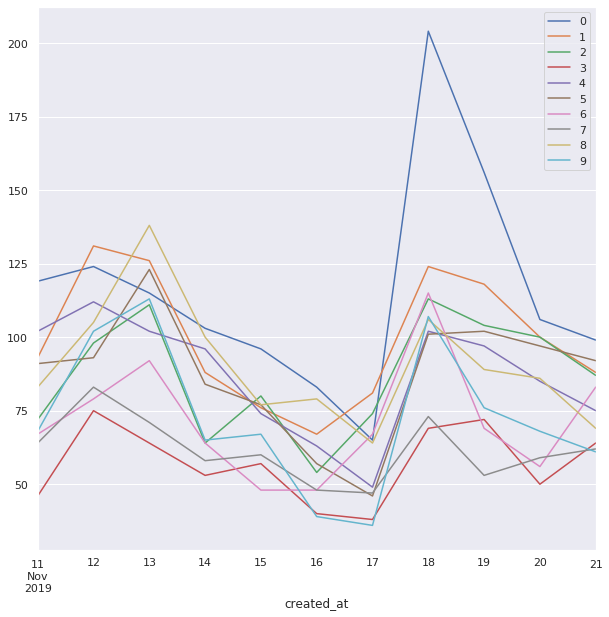

In [448]:
# Count up and plot in one go
boomer_tweets_df.resample('D')[ts].sum().plot()


# Fourth task

## Tour Turn

![alt text](https://media.giphy.com/media/eJF3Yaqc70eAUaYtnZ/giphy.gif)


The site https://faketrump.ai/ is an interesting example of AI-powered fake-text generation. They write:

We built an artificial intelligence model by fine-tuning GPT-2 to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”

Since then several organizations and researchers have shown that it is possible to develop systems to detect “fake text”. We believe that you too can implement a competitive system.

This assignment is not about Natural Language Processing (NLP) but about being able to deal with sequential data using deep learning. Some basic knowledge from M2 can be useful to squeeze the last 1% performance but you should be able to get great results with pure Keras. The data can be found here and has the following format:

tweet	labels
string	boolean
There are 8000 real Trump tweet and 7348 fake ones.

https://raw.githubusercontent.com/DeepLearnI/trump_tweet_classifier/master/code/tweet_labels.csv


In [0]:
faketrump_df = pd.read_csv('https://raw.githubusercontent.com/DeepLearnI/trump_tweet_classifier/master/code/tweet_labels.csv', sep = ",")



In [461]:
faketrump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15348 entries, 0 to 15347
Data columns (total 2 columns):
tweet     15348 non-null object
labels    15348 non-null bool
dtypes: bool(1), object(1)
memory usage: 135.0+ KB


In [0]:
x = faketrump_df['tweet']
y = faketrump_df['labels']

In [490]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Train size = {len(x_train)}')
print(f'Test size = {len(x_test)}')

Train size = 12278
Test size = 3070


# Vectorizing

In [491]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
!pip install -qq -U gensim

In [0]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

In [0]:
# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

In [0]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

In [0]:
# Import stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [0]:
# Tokenize our texts and remove stopwords, also kick out numbers, lower everything

train_tokens = x_train.map(lambda t: [tok.lower() for tok in word_tokenize(t) if tok not in stop_words and tok.isalpha()])
test_tokens = x_test.map(lambda t: [tok.lower() for tok in word_tokenize(t) if tok not in stop_words and tok.isalpha()])

In [0]:
dictionary = Dictionary(train_tokens)

In [0]:
# Filter it for extreme stuff
dictionary.filter_extremes(no_below = 10, no_above=0.4)

In [0]:
# construct corpus using this dictionary
train_corpus = [dictionary.doc2bow(doc) for doc in train_tokens]
test_corpus = [dictionary.doc2bow(doc) for doc in test_tokens]

In [0]:
# Tooling to map between corpus (gensim) and matrix - more general
from gensim.matutils import corpus2csc, corpus2dense

In [0]:

new_X_train = corpus2csc(train_corpus)
new_X_test = corpus2csc(test_corpus)

#Fitting the models

In [502]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(new_X_train.T, y_train)

model.score(new_X_test.T, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7055374592833876

In [0]:
# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(train_corpus)

In [0]:
train_corpus_tfidf = tfidf[train_corpus]
test_corpus_tfidf = tfidf[test_corpus]

In [0]:
new_X_train = corpus2csc(train_corpus_tfidf)
new_X_test = corpus2csc(test_corpus_tfidf)

In [507]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(new_X_train.T, y_train)

model.score(new_X_test.T, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.709771986970684

In [0]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

In [0]:
# Training the LSI model
model_lsi = LsiModel(train_corpus_tfidf, num_topics = 1000, id2word=dictionary)

In [0]:
# Generating the corpus train & test

train_corpus_lsi = model_lsi[train_corpus_tfidf]
test_corpus_lsi = model_lsi[test_corpus_tfidf]

In [0]:
# turn into matrix
train_lsi_corpus = corpus2dense(train_corpus_lsi, 1000 )

test_lsi_corpus = corpus2dense(test_corpus_lsi, 1000)

In [528]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_lsi_corpus.T, y_train)

model.score(test_lsi_corpus.T, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6915309446254072

In [0]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix_train = MatrixSimilarity(train_corpus_lsi)

# this will create you a document - document similarity matrix (you could import it as a network...)
document_topic_matrix_train_ix = document_topic_matrix_train.index

# Same for test-set
document_topic_matrix_test = MatrixSimilarity(test_corpus_lsi)
document_topic_matrix_test_ix = document_topic_matrix_test.index

In [535]:
# Prepare the query


doc = "It is finally happening for our great clean coal miners!"

vec_bow = dictionary.doc2bow(doc.lower().split()) # convert to bag of words
vec_tfidf = tfidf[vec_bow] # convert to tfidf
vec_lsi = model_lsi[vec_tfidf]  # convert the query to LSI space

print(len(vec_lsi))
print(vec_lsi[:10])

1000
[(0, 0.08044757653706444), (1, -0.0037904240167307302), (2, -0.04469988663034984), (3, 0.022101688698963177), (4, 0.003378223064451472), (5, 0.008010562910657546), (6, -0.005876793773975397), (7, 0.004187552775879166), (8, -0.04018015524145258), (9, 0.007726169225240897)]


In [540]:
sims = document_topic_matrix_train[vec_lsi]

sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, s in sims[:1]: #ten most similar texts
    print(s, x_train[i])
    print(s, y_train[i])

0.76977205 The Failing and Corrupt @nytimes estimated the crowd last night at “1000 people,” when in fact it was many times that number - and the arena was rockin’. This is the way they demean and disparage. They are very dishonest people who don’t “get” me, and never did!
0.76977205 True
